<a href="https://colab.research.google.com/github/Nutsudapenpong/DPDM/blob/master/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-data-tables

     |████████████████████████████████| 108 kB 4.4 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 178 kB 36.3 MB/s 
     |████████████████████████████████| 41 kB 518 kB/s 


#Azure Table (Cloud DB)
#1. create DB on Azure Portal
#2. insert data
#3. query data

In [5]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [6]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=apiprototype;AccountKey=lcmRcZUgG5NexF8rll5uSELA2b3Br+N1vb+faKC0ssek2KIp6e+03dvHGgcI+mfCHDquVqXQwczWsWrKCQy+Bw==;EndpointSuffix=core.windows.net')

Insert data

In [7]:
table_client = table_service.get_table_client(table_name="testdb")

insert by pre-create TableEntity

In [11]:
task = TableEntity()
task[u'PartitionKey'] = u'part1'
task[u'RowKey'] = u'001'
task[u'name'] = u'stat'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 54, 4, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A54%3A05.4699164Z\'"',
 'version': '2019-02-02'}

insert dictionary

In [12]:
task = {u'PartitionKey':u'part1', u'RowKey' : u'002', u'name': u'python', u'room': u'Online', u'age': 3}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 57, 5, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A57%3A05.0802401Z\'"',
 'version': '2019-02-02'}

Query

query by partitionkey&rowkey (เลือกข้อมูล)

In [ ]:
table_client = table_service.get_table_client(table_name="testdb")

In [13]:
task = table_client.get_entity('part1', '002')
print(task)

{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'python', 'room': 'Online', 'age': 3}


In [14]:
for i in range(10):
    task = {u'PartitionKey':u'partQ', u'RowKey' : f'00{i+10}', u'name': u'python', u'room': u'Online', u'age': i}
    table_client.create_entity(entity=task)

query by logic (ดึงข้อมูลมาประมวลผล)

In [15]:
tasks = table_client.query_entities(query_filter="age gt 5")
print(tasks)

<iterator object azure.core.paging.ItemPaged at 0x7fd103341990>


In [16]:
for t in tasks:
  print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'name': 'stat', 'age': 30}
{'PartitionKey': 'partQ', 'RowKey': '0016', 'name': 'python', 'room': 'Online', 'age': 6}
{'PartitionKey': 'partQ', 'RowKey': '0017', 'name': 'python', 'room': 'Online', 'age': 7}
{'PartitionKey': 'partQ', 'RowKey': '0018', 'name': 'python', 'room': 'Online', 'age': 8}
{'PartitionKey': 'partQ', 'RowKey': '0019', 'name': 'python', 'room': 'Online', 'age': 9}


In [17]:
!pip install azure-cognitiveservices-vision-computervision

In [21]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

import os

credentials = CognitiveServicesCredentials('cbcc14b3c22146aab42bb47ee033d093')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [45]:
url = "https://apiprototype.blob.core.windows.net/pics/60611207_2186416784812288_6317344628341211136_n.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces, VisualFeatureTypes.description])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 25, 'gender': <Gender.female: 'Female'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7fd0f9175c50>}


In [46]:
for each_cap in image_analysis.description.captions:
    print(each_cap)

{'additional_properties': {}, 'text': 'a person wearing a red hoodie', 'confidence': 0.48284265398979187}


In [25]:
print(tag.face_rectangle.height,tag.face_rectangle.width,tag.face_rectangle.top,tag.face_rectangle.left)

133 133 446 360


In [26]:
import cv2

In [27]:
from matplotlib import pyplot as plt

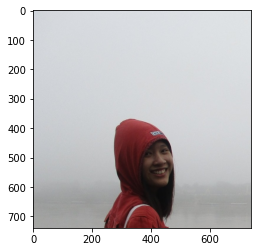

In [42]:
img = cv2.imread('/content/60611207_2186416784812288_6317344628341211136_n.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [43]:
img2 = cv2.rectangle(img, (tag.face_rectangle.left,tag.face_rectangle.top,tag.face_rectangle.width,tag.face_rectangle.height), (0,0,255), 5)

25
Gender.female


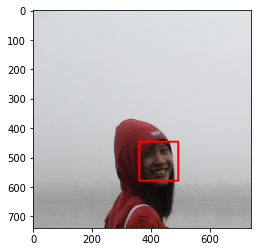

In [44]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)